___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### Load Dataset

In [23]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
df.rename(columns={"Annual Income (k$)":"Annual_Income",
                  "Spending Score (1-100)":"Spending_Score"}, inplace=True)

In [29]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [30]:
## Check for duplicates
df.duplicated().sum()

0

In [31]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





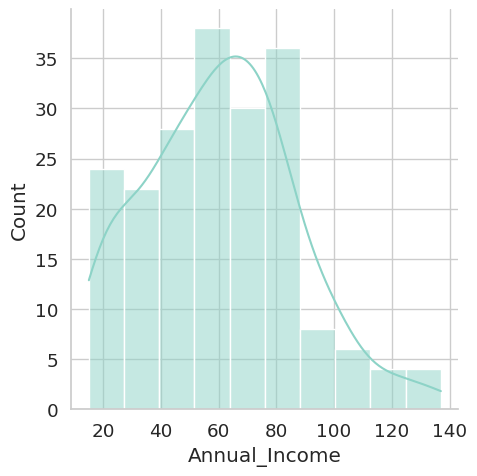

In [32]:
sns.displot(df['Annual_Income'],kde=True);

<Figure size 640x480 with 0 Axes>

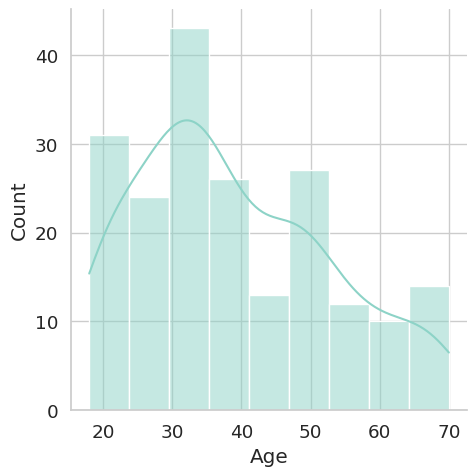

<Figure size 640x480 with 0 Axes>

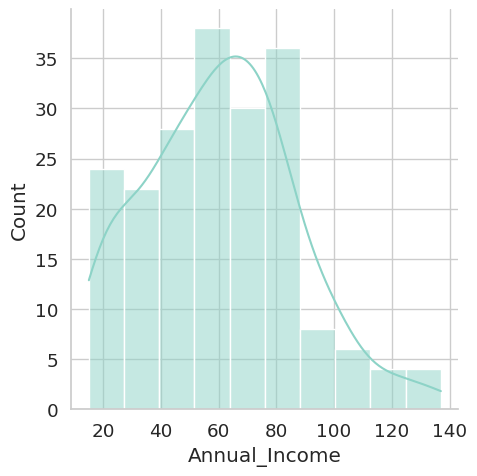

<Figure size 640x480 with 0 Axes>

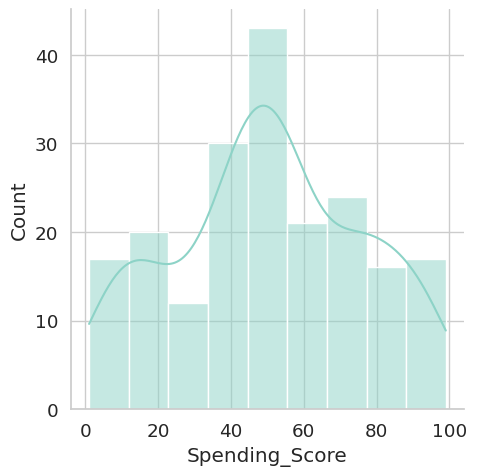

In [33]:
columns=['Age', 'Annual_Income','Spending_Score']
for i in columns:   ## For each item/feature in the column variable created,
    plt.figure()    ## create a new figure for each feature when
    sns.displot(df[i],kde=True);   ## a plot is run

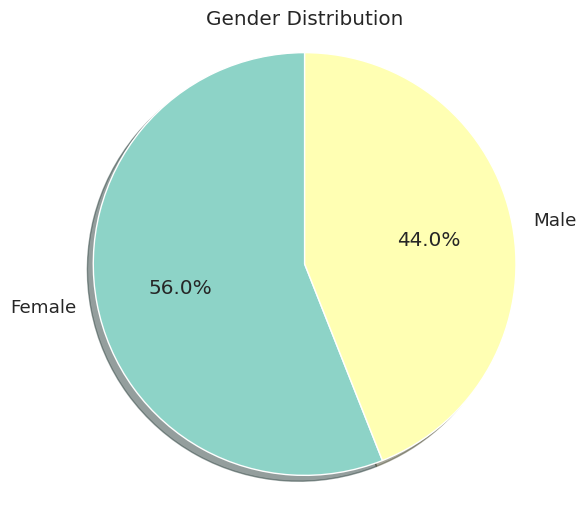

In [34]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.set_palette("Set3")
sns.set_context("notebook", font_scale=1.2)

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()

In [37]:
df.drop(columns="CustomerID", inplace=True)

In [38]:
## To know the mean of each features between the genders
df.groupby(['Gender'])['Age', 'Annual_Income','Spending_Score'].mean()


,Age,Annual_Income,Spending_Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [39]:
df.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<Axes: >

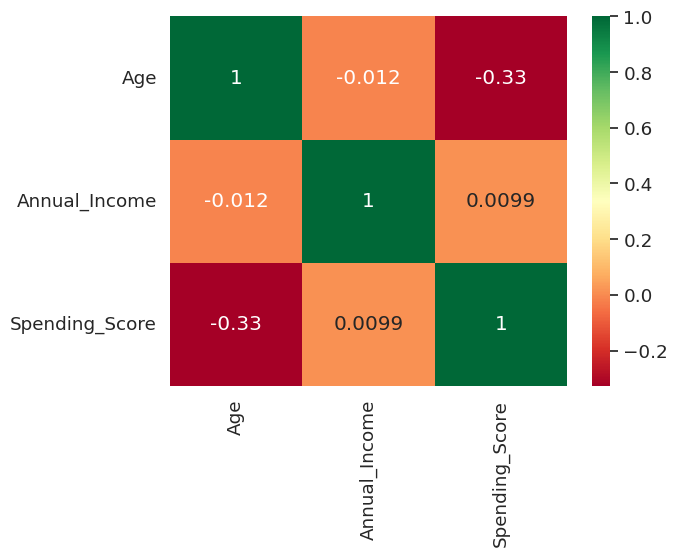

In [40]:
sns.heatmap(df.corr(), annot  = True, cmap = 'RdYlGn')

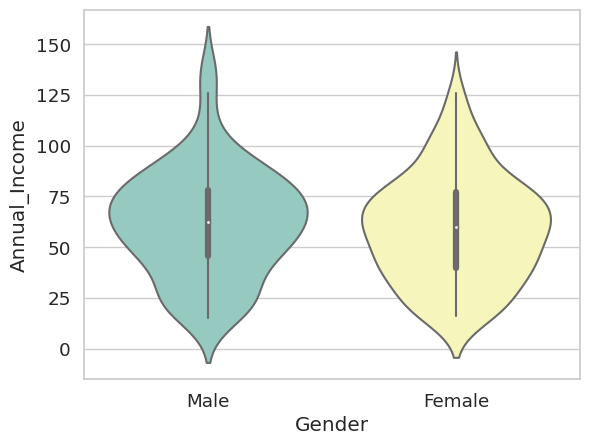

In [41]:
# For both Sexes
sns.violinplot(x=df.Gender,y=df.Annual_Income);

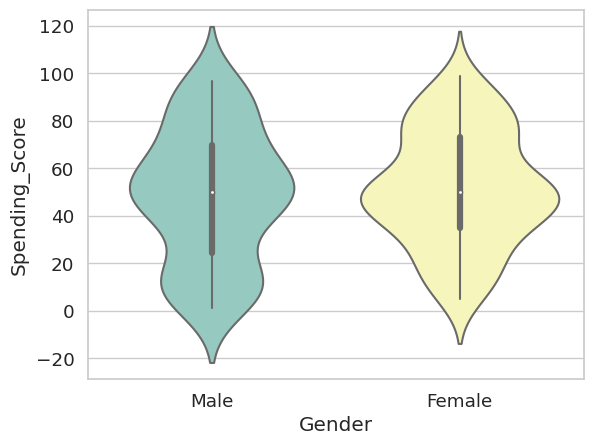

In [42]:
# For both Sexes
sns.violinplot(x=df.Gender,y=df.Spending_Score);

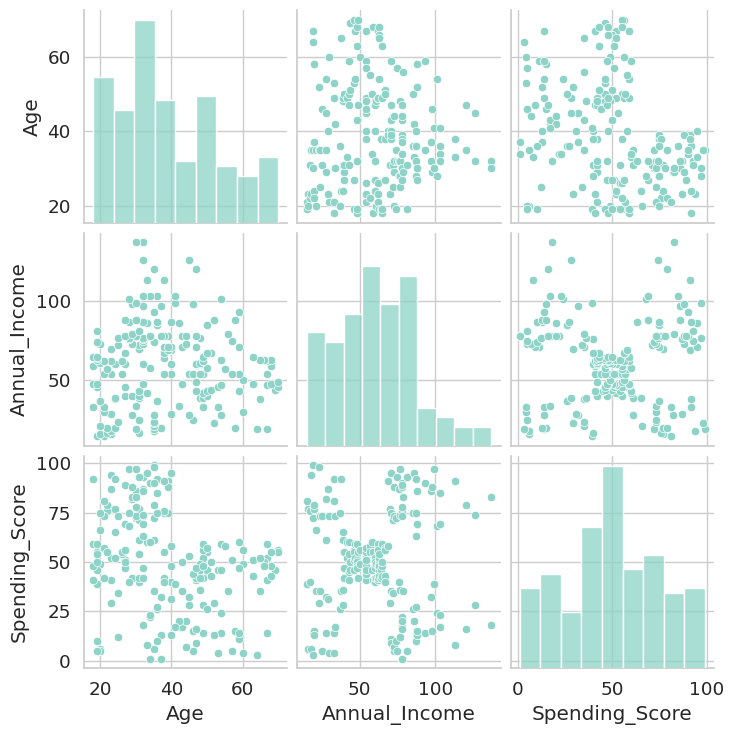

In [43]:
sns.pairplot(df)

<Axes: >

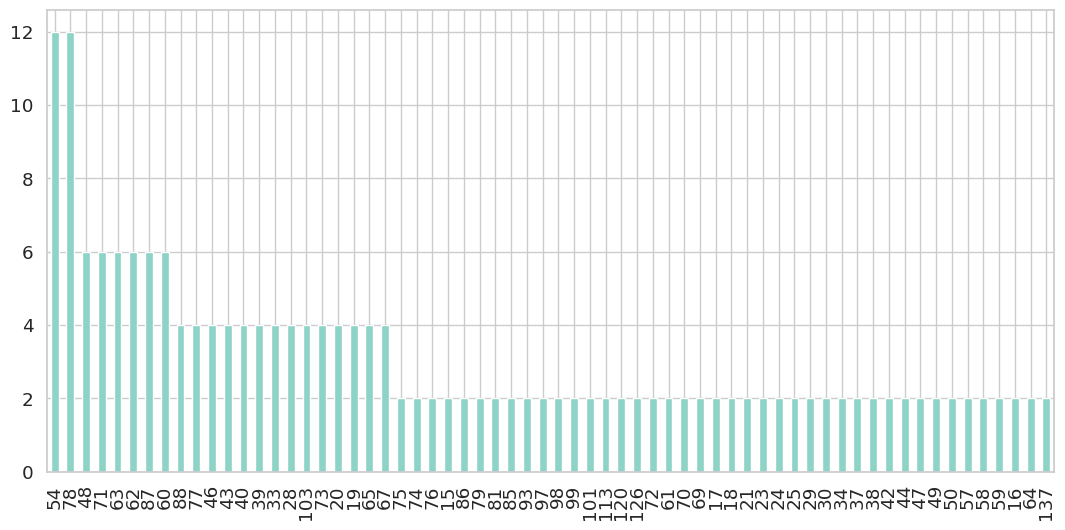

In [44]:
df['Annual_Income'].value_counts().plot.bar(figsize = (13, 6))


<Axes: >

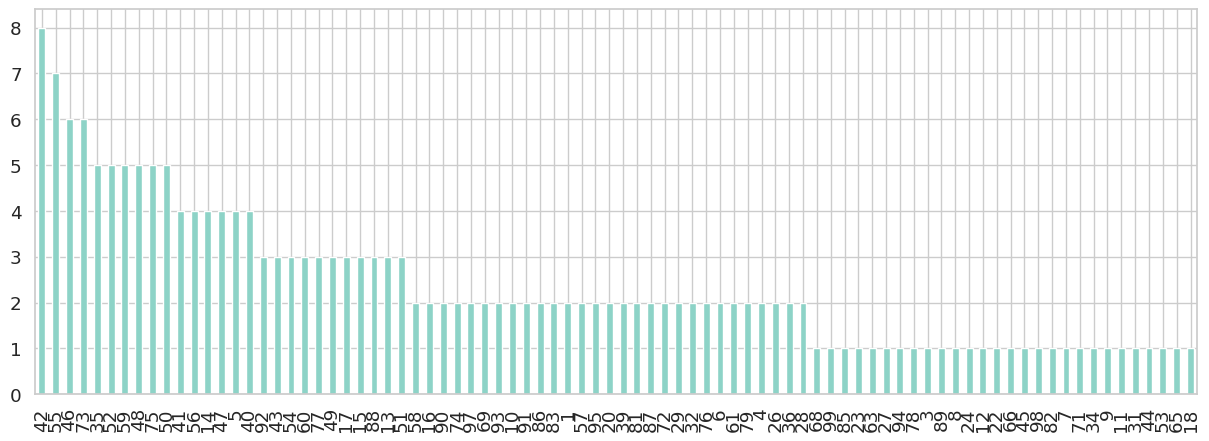

In [45]:
df['Spending_Score'].value_counts().plot.bar(figsize = (15, 5))

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [46]:
df_1 = df[['Age', 'Spending_Score']]
df_1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

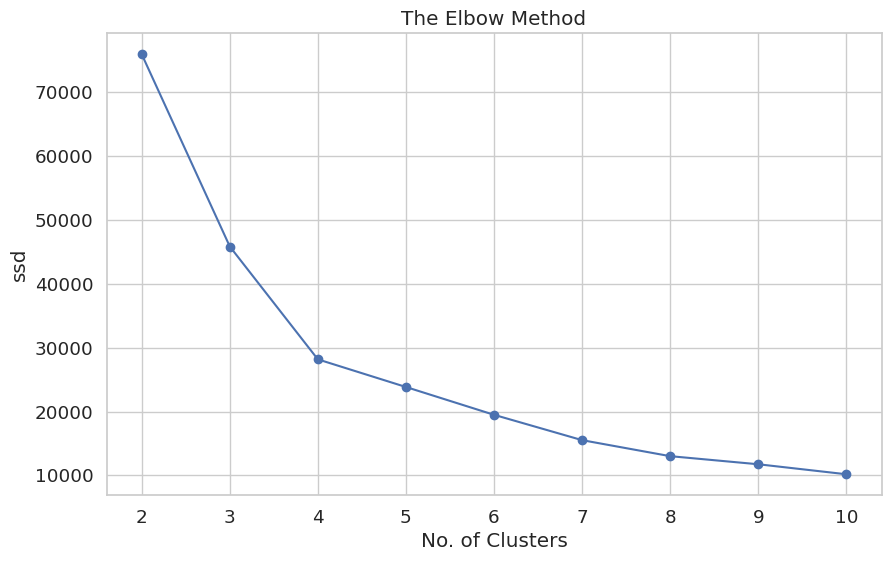

In [47]:
from sklearn.cluster import KMeans
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(df_1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

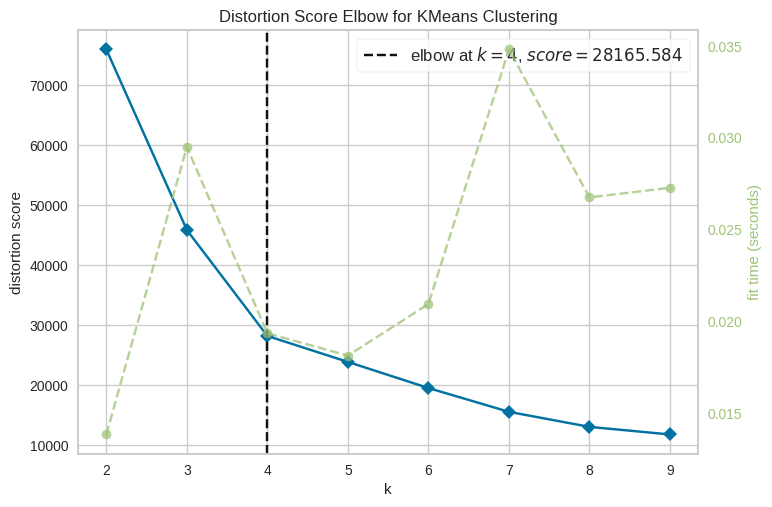

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_1)
visu.poof()

### Why silhouette_score is negative?
silhouette_score = (b-a)/max(a,b)

b : the mean nearest-cluster distance
a : the mean intra-cluster distance

for red point,

b = 1
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29
<br></br>
<b>
Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.</b>

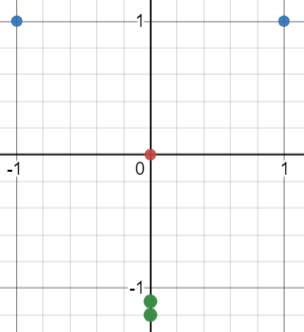

#### *iii. Apply K Means*

In [49]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [50]:
df_1["cluster_Kmeans"] = kmeans.fit_predict(df_1)
df_1

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*
In our analysis, when we clustered individuals based on their Age and Spending_Score, we noticed that individuals with low spending scores are found across all age groups. Moreover, we observed that those with spending scores between 40 and 60 could be further divided into two subgroups, one concentrated between the ages of 20 and 40 and the other between the ages of 40 and 70.

Interestingly, the age group with the highest spending score was predominantly within the 20-40 age range. Looking solely at the age factor, it becomes evident that the majority of spending activity is centered around the 20-40 age group. This suggests that younger individuals are more inclined to spend money.

On the other hand, there was no distinct group of older individuals with high spending scores. This insight could be leveraged to develop specific expenditure strategies targeted at the younger demographic. However, when examining age and spending scores, we couldn't derive very detailed insights, and more granular data may be needed for a more comprehensive analysis.

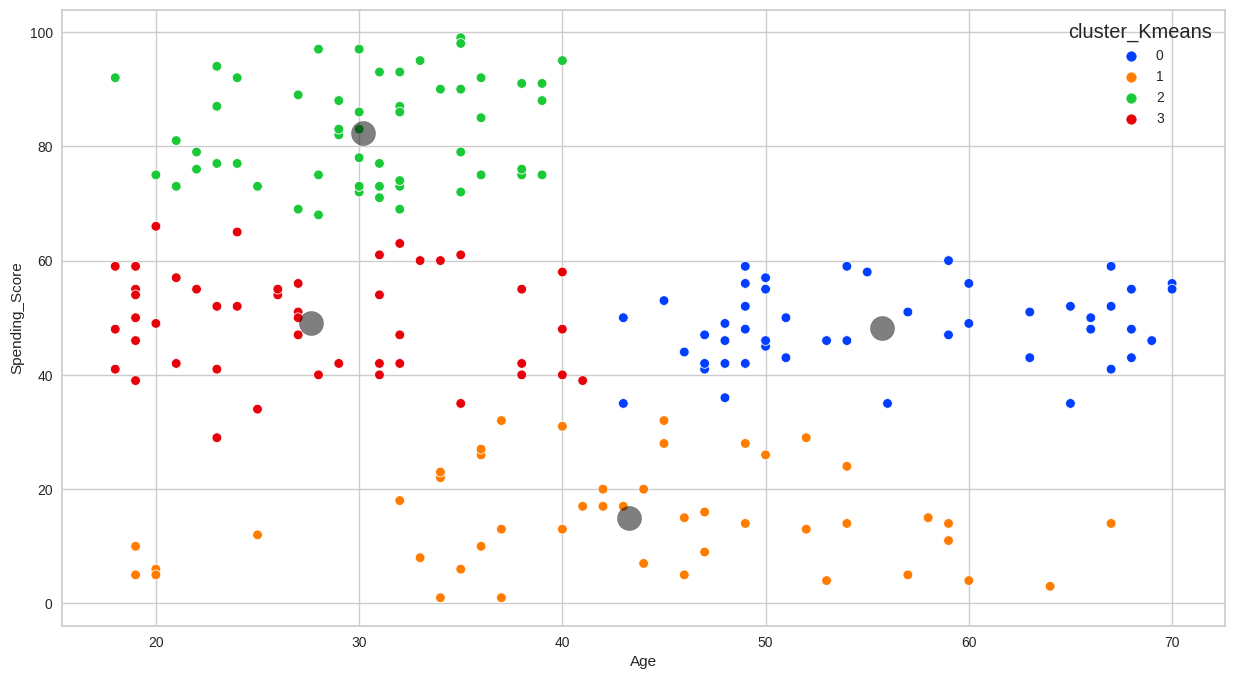

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=df_1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [52]:
df_2 = df[['Annual_Income', 'Spending_Score']]
df_2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

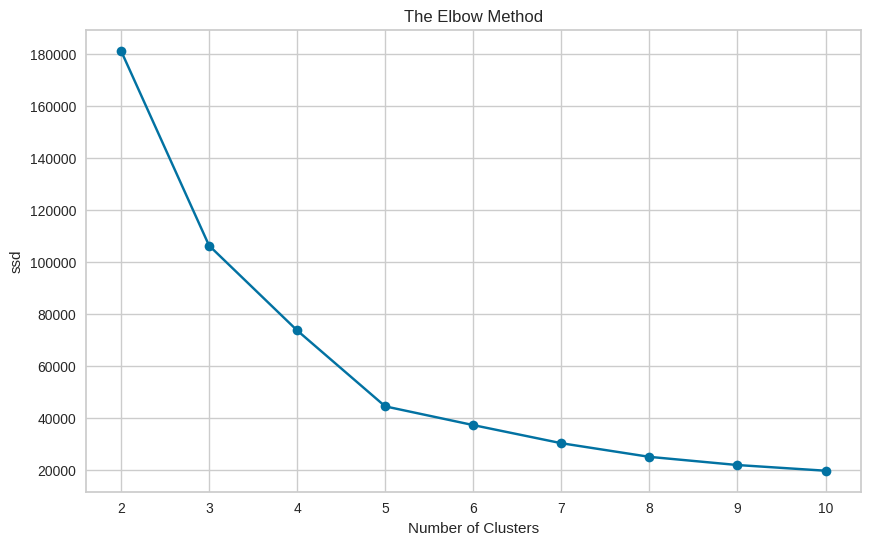

In [53]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show();

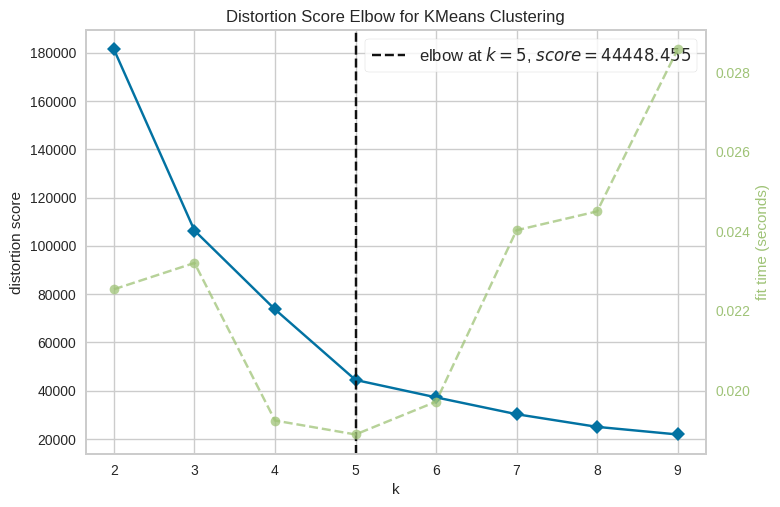

In [67]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_2)
visu.poof();

#### *iii. Apply K Means*

In [55]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(df_2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [56]:
df_2['cluster_Kmeans'] = kmeans2.fit_predict(df_2) #kmeans2.labels_
df_2

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

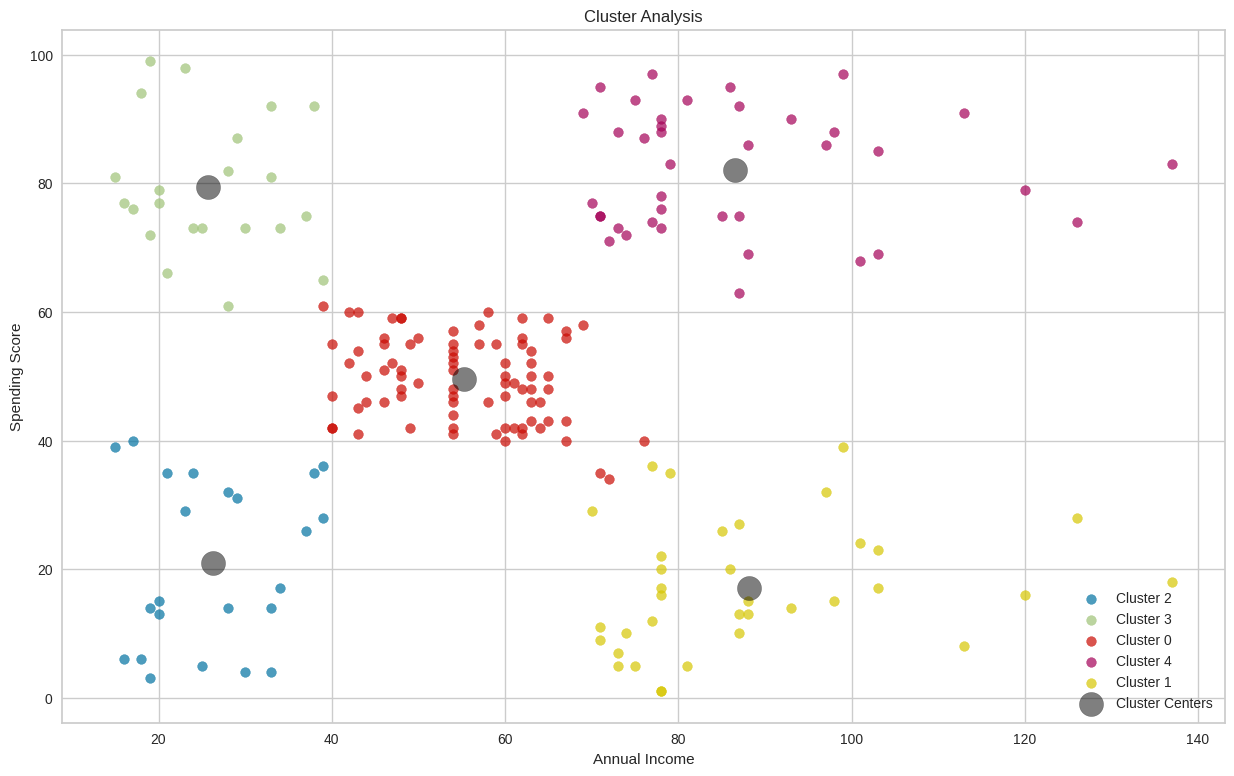

In [59]:
import matplotlib.pyplot as plt

# Create a scatterplot with specified figure size
plt.figure(figsize=(15, 9))

# Scatterplot for data points colored by cluster labels
for label in df_2['cluster_Kmeans'].unique():
    plt.scatter(
        df_2[df_2['cluster_Kmeans'] == label]['Annual_Income'],
        df_2[df_2['cluster_Kmeans'] == label]['Spending_Score'],
        label=f'Cluster {label}',
        alpha=0.7
    )

# Identify and plot cluster centers as black points
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Analysis')
plt.legend()

# Show the plot
plt.show()


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [60]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [62]:
X1 = df.loc[:,["Age","Spending_Score"]]
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


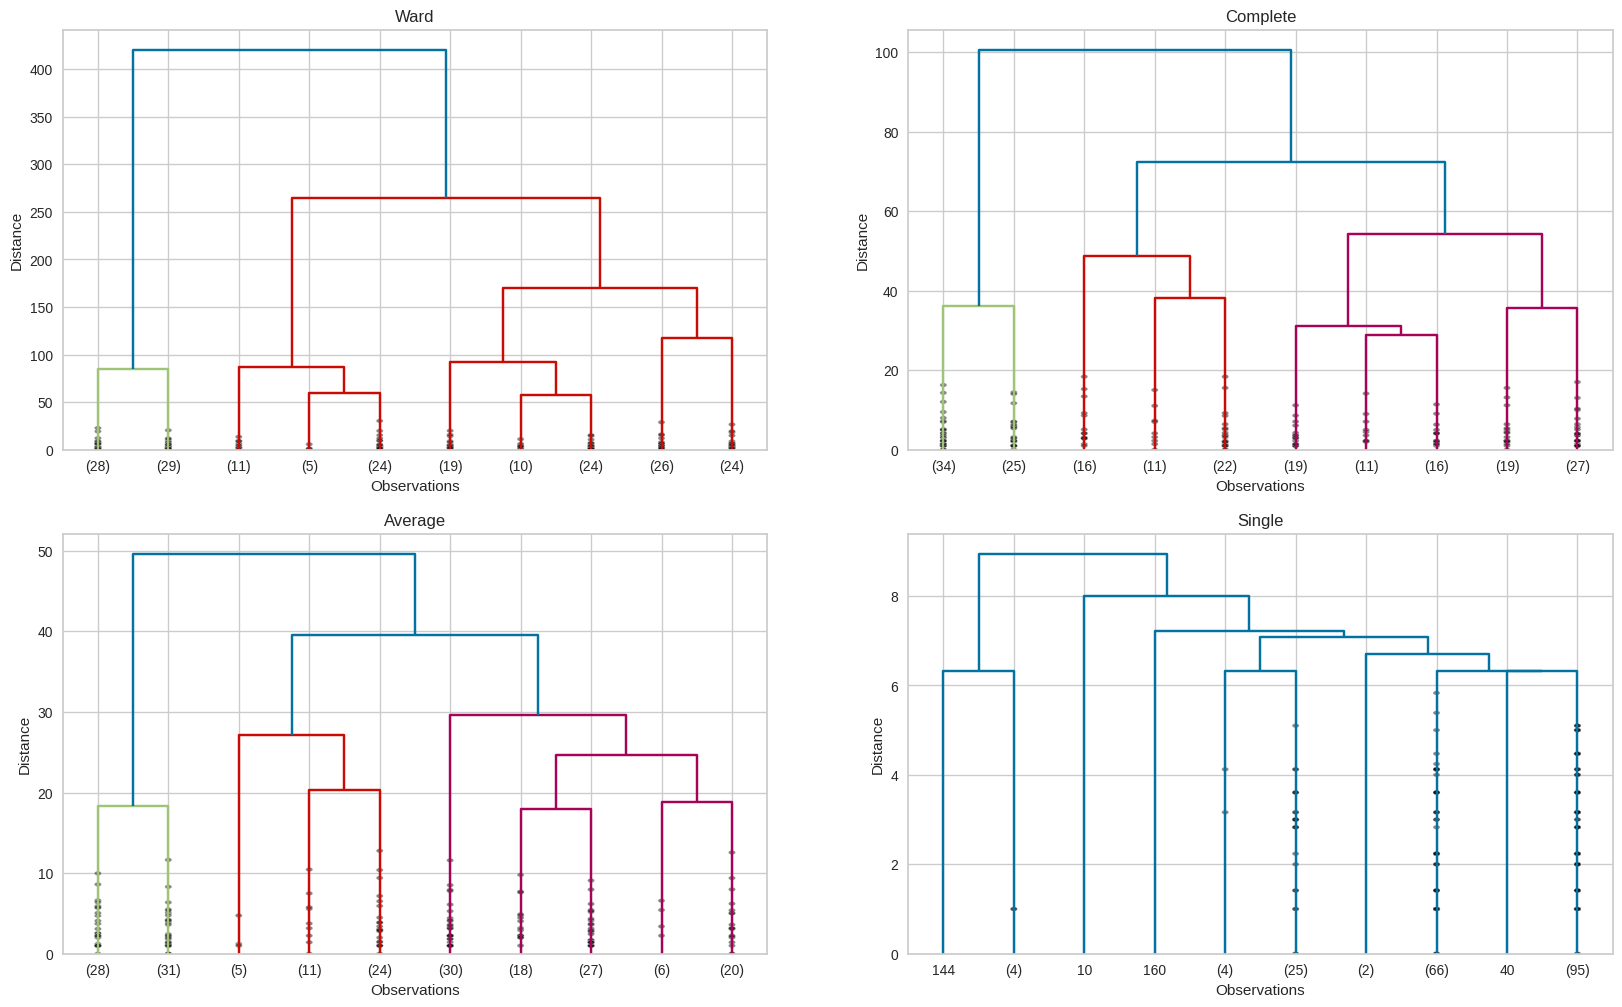

In [65]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Calculate linkage matrices for different linkage methods
hc_ward = linkage(X1, method="ward")
hc_complete = linkage(X1, method="complete")
hc_average = linkage(X1, method="average")
hc_single = linkage(X1, method="single")

# Create a figure for the dendrogram
plt.figure(figsize=(20, 12))

# Create a dendrogram for Ward linkage
plt.subplot(221)
plt.title("Ward")
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.xlabel("Observations")
plt.ylabel("Distance")

# Create a dendrogram for Complete linkage
plt.subplot(222)
plt.title("Complete")
dendrogram(hc_complete, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.xlabel("Observations")
plt.ylabel("Distance")

# Create a dendrogram for Average linkage
plt.subplot(223)
plt.title("Average")
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.xlabel("Observations")
plt.ylabel("Distance")

# Create a dendrogram for Single linkage
plt.subplot(224)
plt.title("Single")
dendrogram(hc_single, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.xlabel("Observations")
plt.ylabel("Distance")

plt.show()


## Clustering based on Annual Income and Spending Score- x2

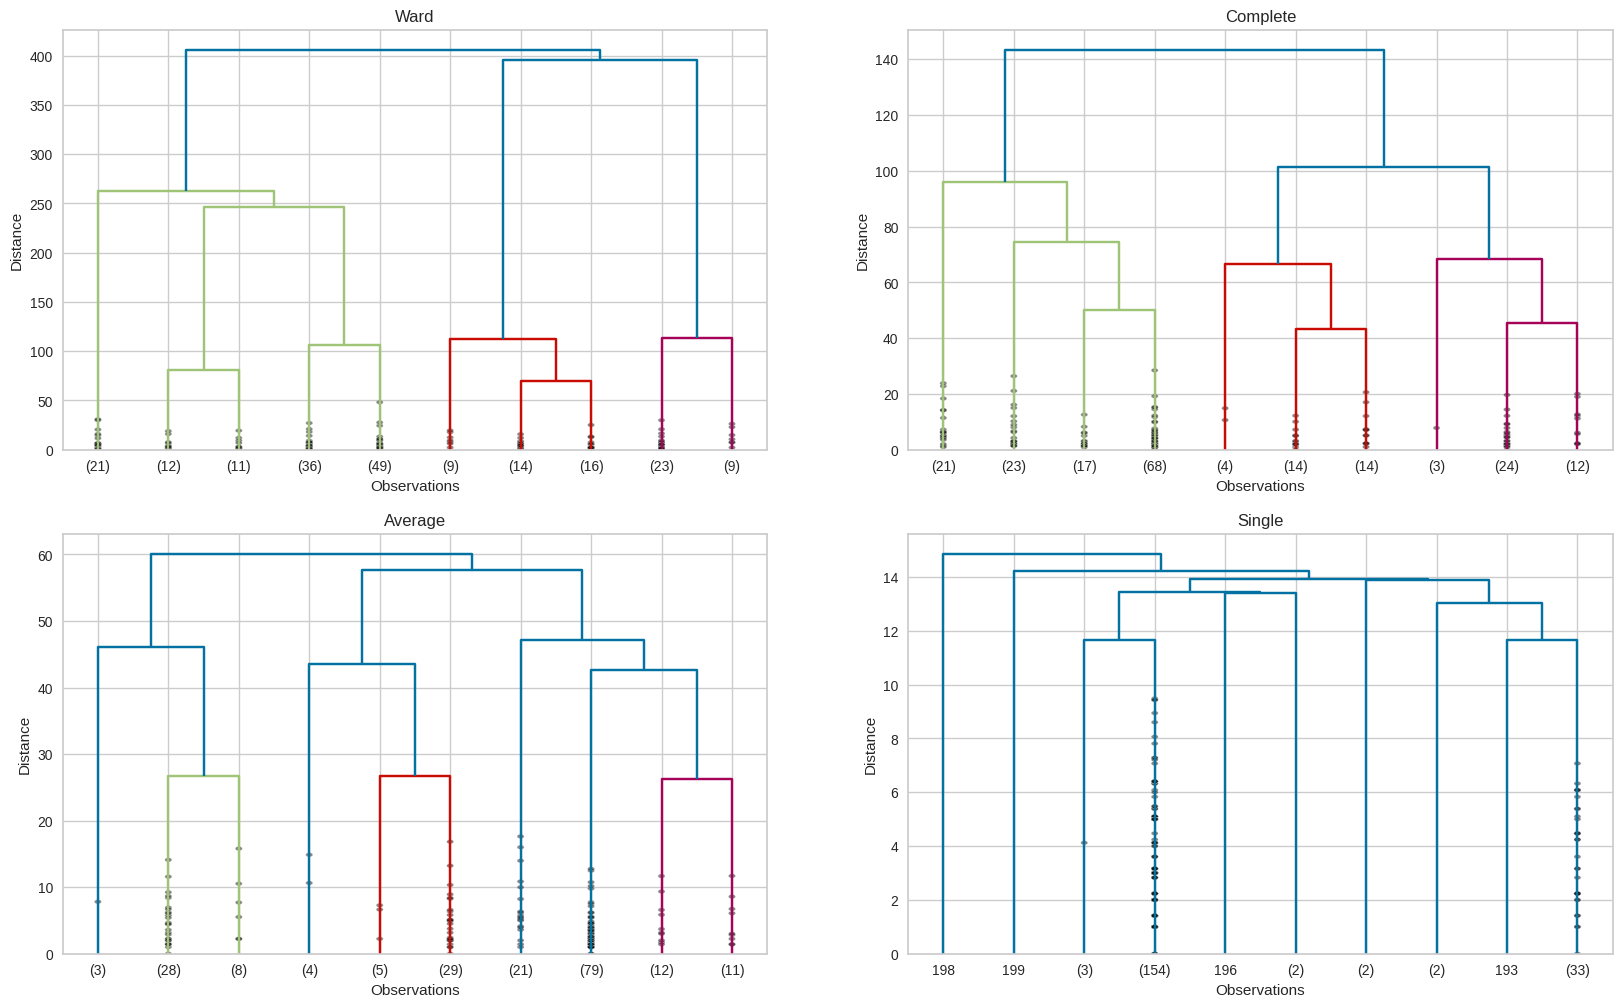

In [70]:
hc_ward = linkage(y = df_2, method = "ward")
hc_complete = linkage(df_2, "complete")
hc_average = linkage(df_2, "average")
hc_single = linkage(df_2, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

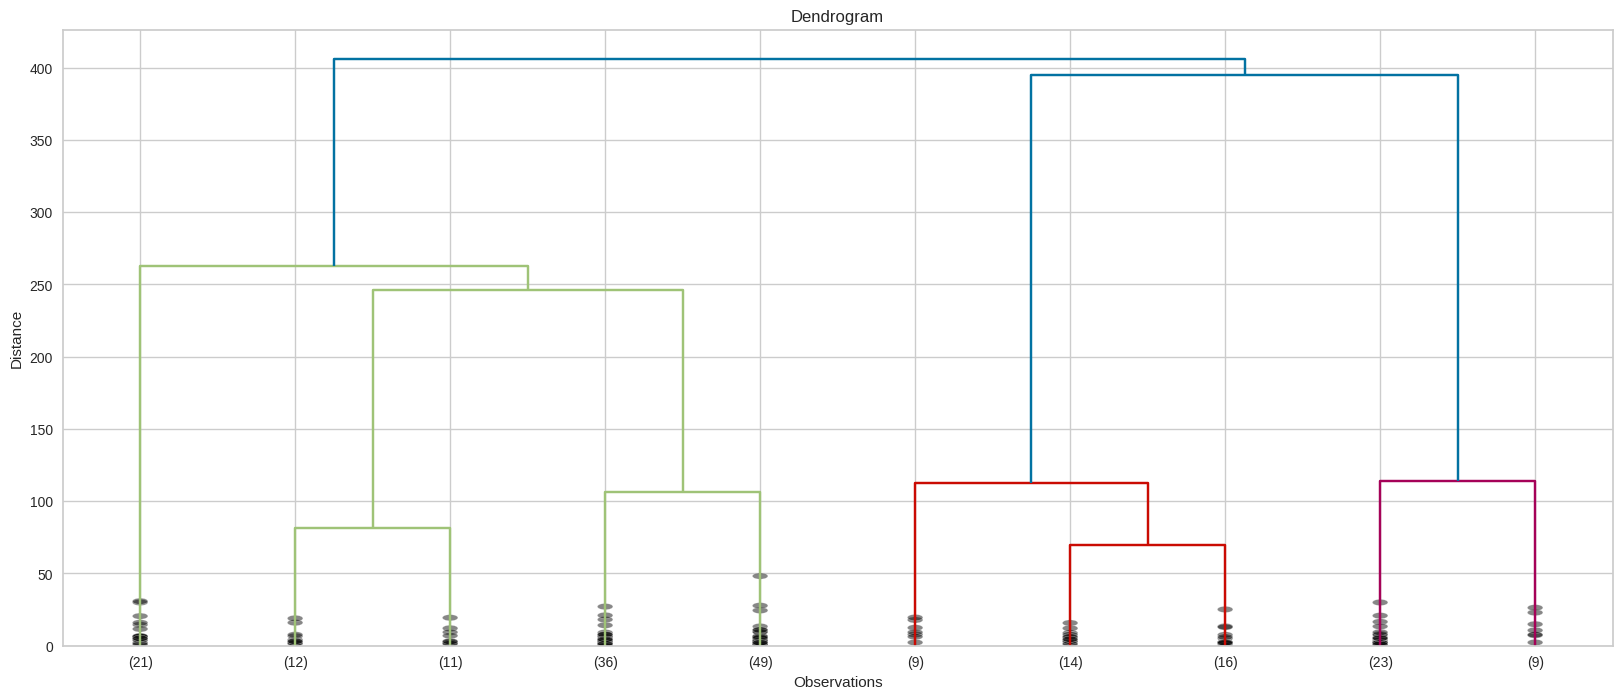

In [71]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [69]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


#### Age and Spending Score- x1

In [72]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)


In [79]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score,cluster_Agg
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


In [87]:
df_1

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


#### Annual Income and Spending Score- x2

In [74]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(df_2)

In [78]:
df_2['cluster_Agg'] = y_agg2
df_2.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

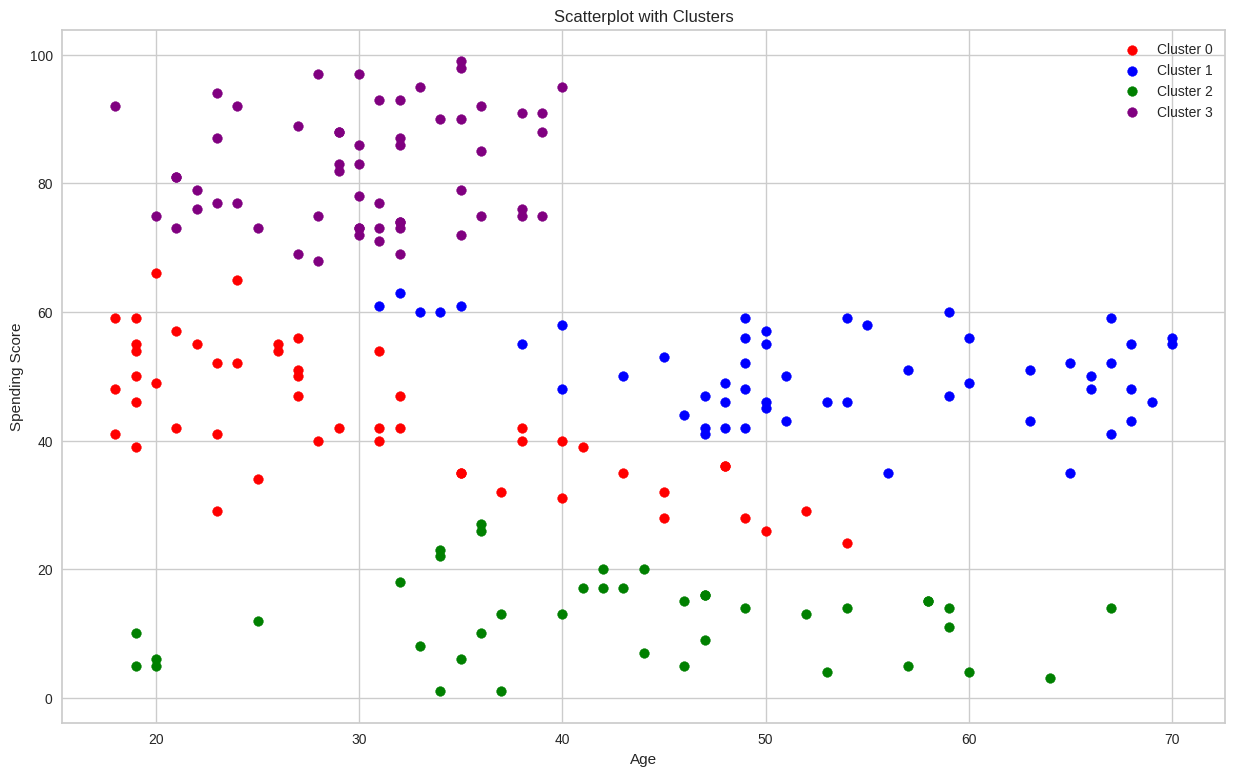

In [80]:
plt.figure(figsize=(15, 9))

# Define colors for each cluster
colors = np.array(['red', 'blue', 'green', 'purple', 'orange'])

# Loop through unique cluster labels and create scatter plots
for cluster_label in np.unique(X1['cluster_Agg']):
    cluster_data = X1[X1['cluster_Agg'] == cluster_label]
    plt.scatter(cluster_data['Age'], cluster_data['Spending_Score'], label=f'Cluster {cluster_label}', c=colors[cluster_label])

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatterplot with Clusters')
plt.legend()

# Show the plot
plt.show()

Certainly, you can rephrase the text as follows:

"After comparing the outcomes of K-Means and Agglomerative clustering,It's apparent that K-Means yielded a slightly more effective clustering result. In contrast, Agglomerative clustering struggled to clearly differentiate between the blue and green clusters. As a result, we have decided to employ the K-Means algorithm for X1."

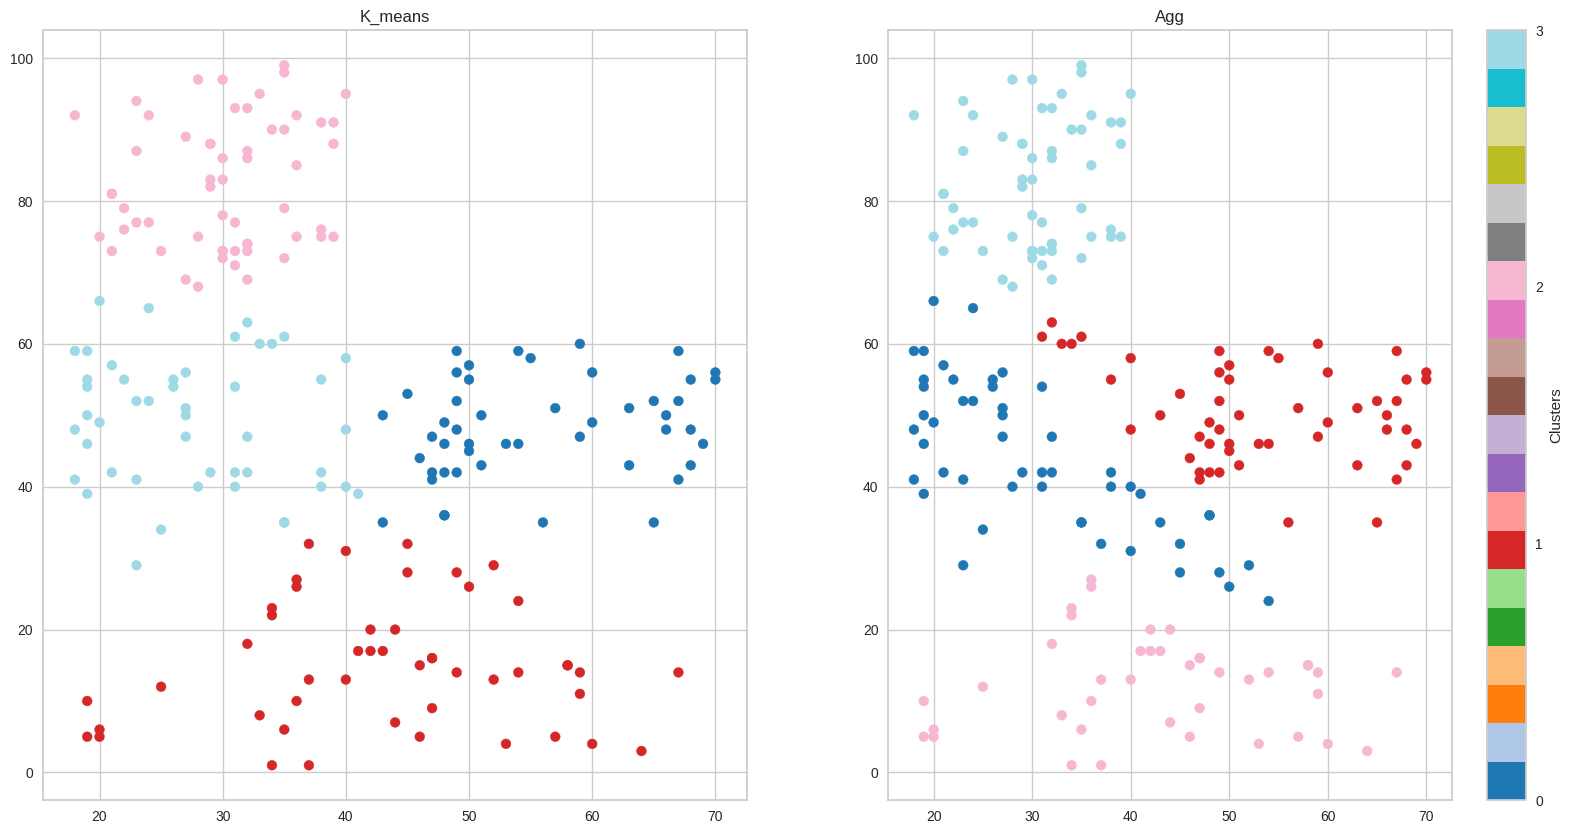

In [90]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatterplot for K-means
scatter_kmeans = axes[0].scatter(df_1['Age'], df_1['Spending_Score'], c=df_1['cluster_Kmeans'], cmap='tab20', s=50)
axes[0].set_title("K_means")

# Scatterplot for Agglomerative
scatter_agg = axes[1].scatter(df_1['Age'], df_1['Spending_Score'], c=df_1['cluster_Agg'], cmap='tab20', s=50)
axes[1].set_title("Agg")

# Add a colorbar to the second subplot
cbar = plt.colorbar(scatter_agg, ax=axes[1], ticks=range(len(df_1['cluster_Agg'].unique())))
cbar.set_label('Clusters')

# Show the plot
plt.show()


#### Annual Income and Spending Score- x2

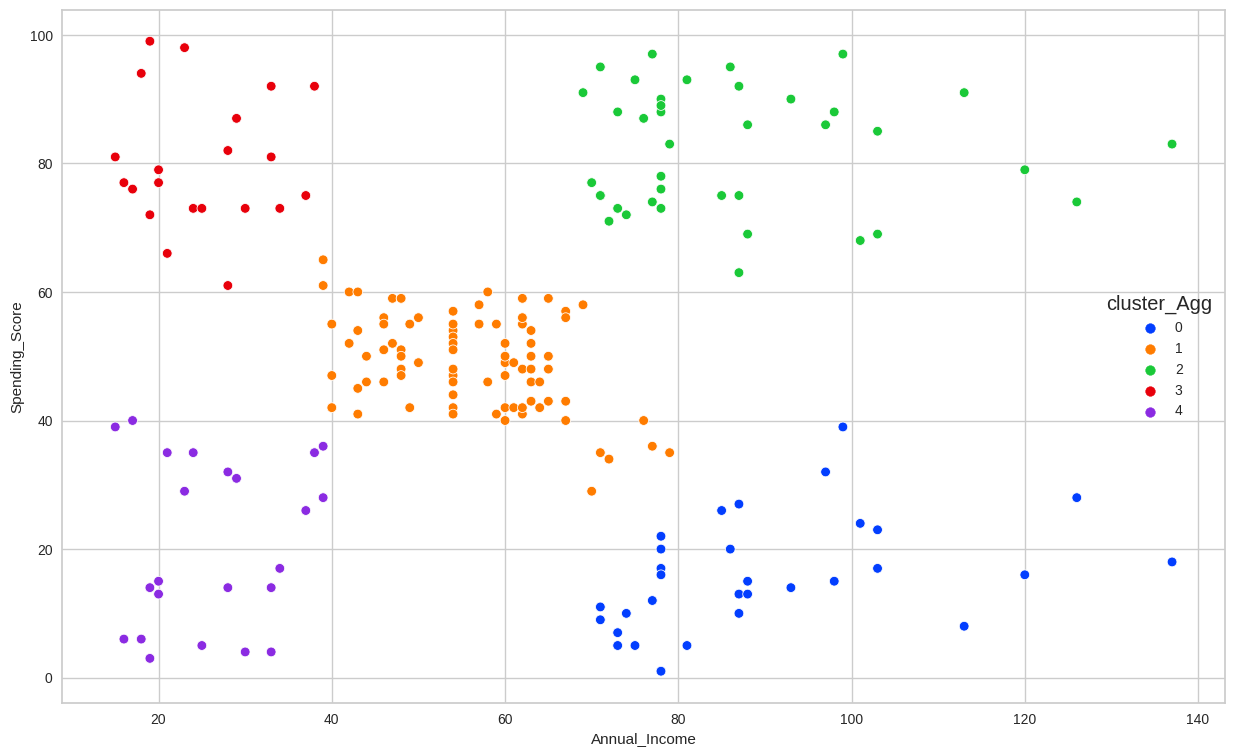

In [91]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_2 ,palette="bright");

Text(0.5, 1.0, 'Agg')

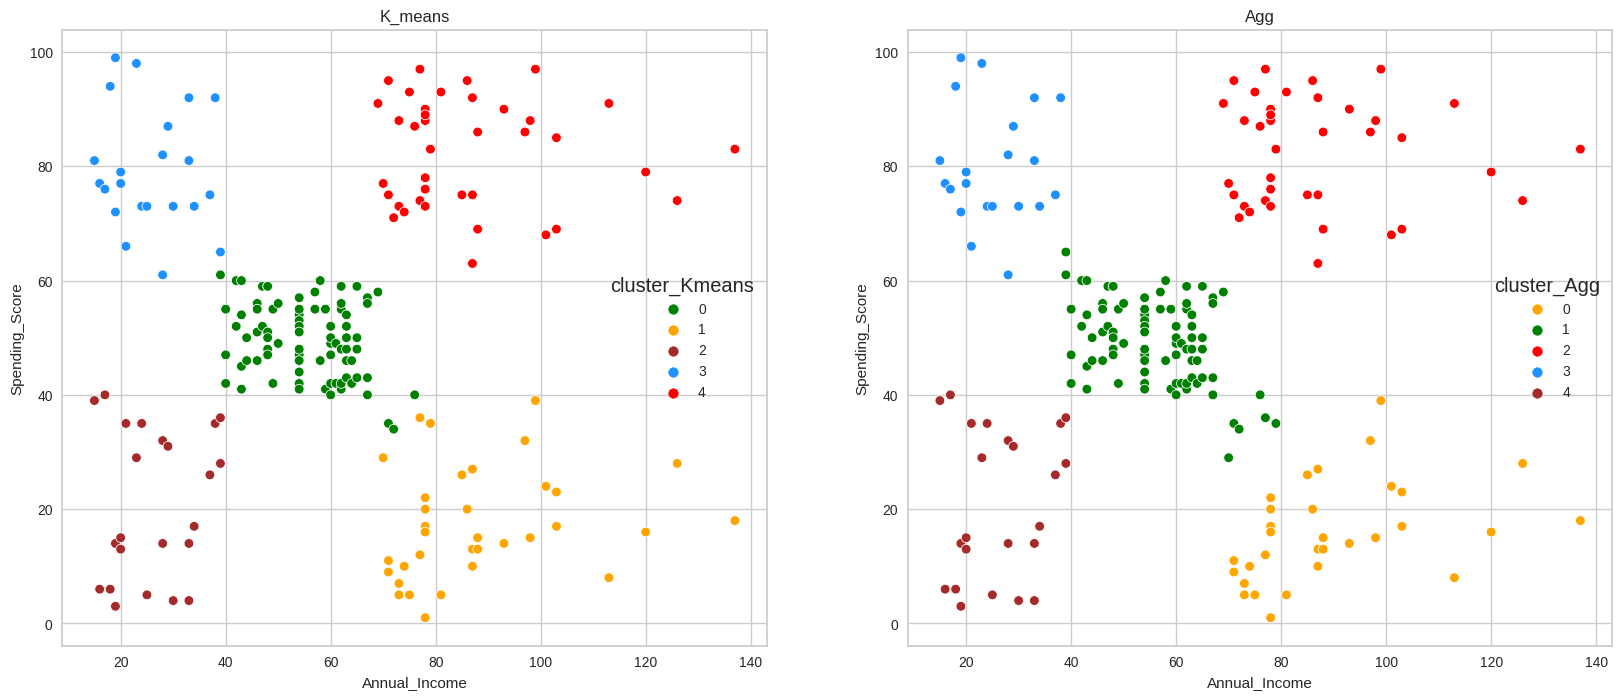

In [94]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df_2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=df_2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

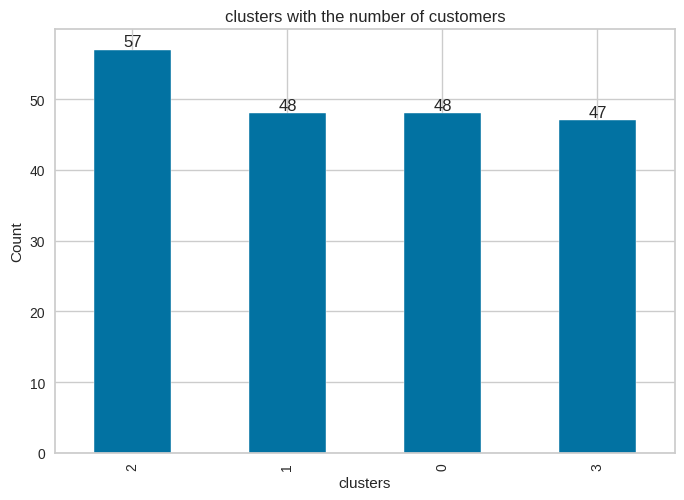

In [95]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [99]:
# Grouping on the clusters we made and got the average age scores, annual income, and spending scores for each cluster.
df["cluster_Age_Spending_Score"] = df_1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


Group 0 predominantly comprised individuals aged over 50, while Group 1 was primarily composed of individuals in the middle-age range. Groups 2 and 3, on the other hand, were made up of a slightly younger demographic. However, when examining annual income, there isn't a clear distinction among these groups. It appears that the data, which exhibits similar density, was mostly gathered from the same location. In terms of spending scores, the blue and pink groups may potentially represent the same cluster, as their values are closely aligned.

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

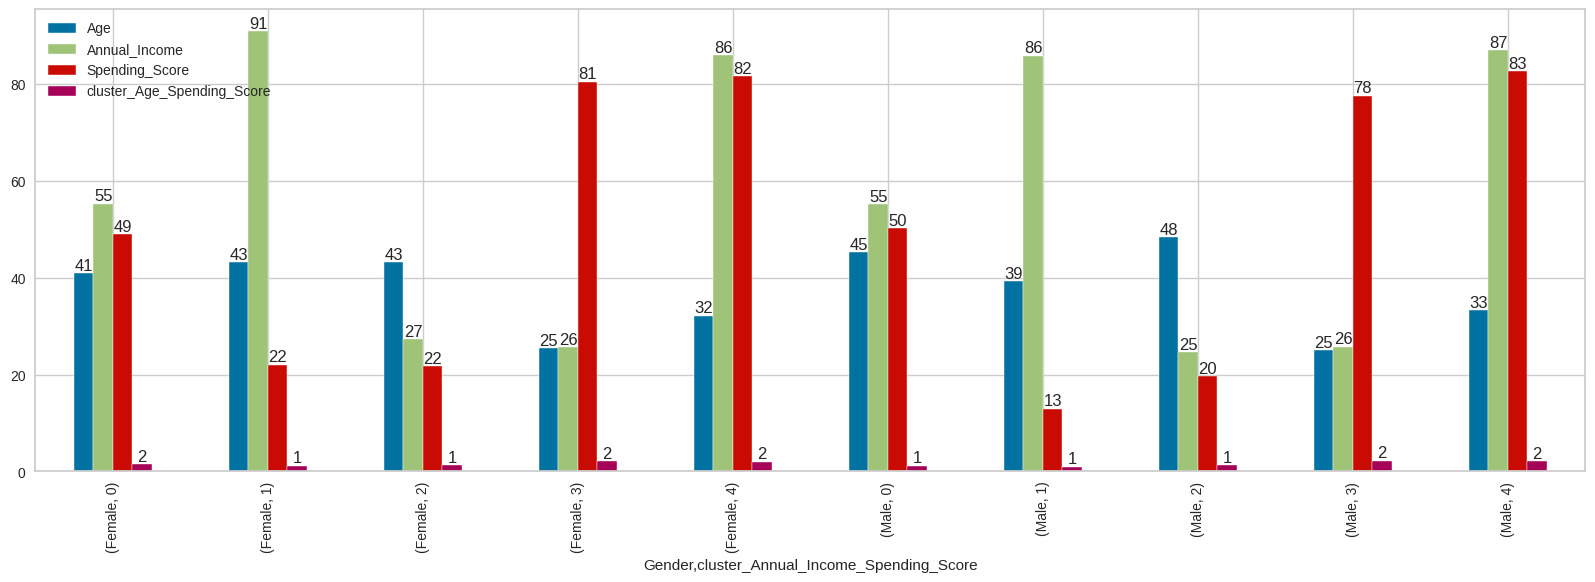

In [101]:
df["cluster_Annual_Income_Spending_Score"] = df_2.cluster_Kmeans
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

Cluster 0: This group exhibits a wide age range, with an average annual income and average spending scores.

Cluster 1: Cluster 1 consists of individuals in the middle-age range, with a high annual income but very low spending scores.

Cluster 2: Individuals in this cluster are primarily middle-aged and above, with low annual income and low spending scores.

Cluster 3: Cluster 3 is characterized by a younger age range, low annual income, and very high spending scores.

Cluster 4: In this group, the age range is average and slightly below, with high annual income and high spending scores.


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

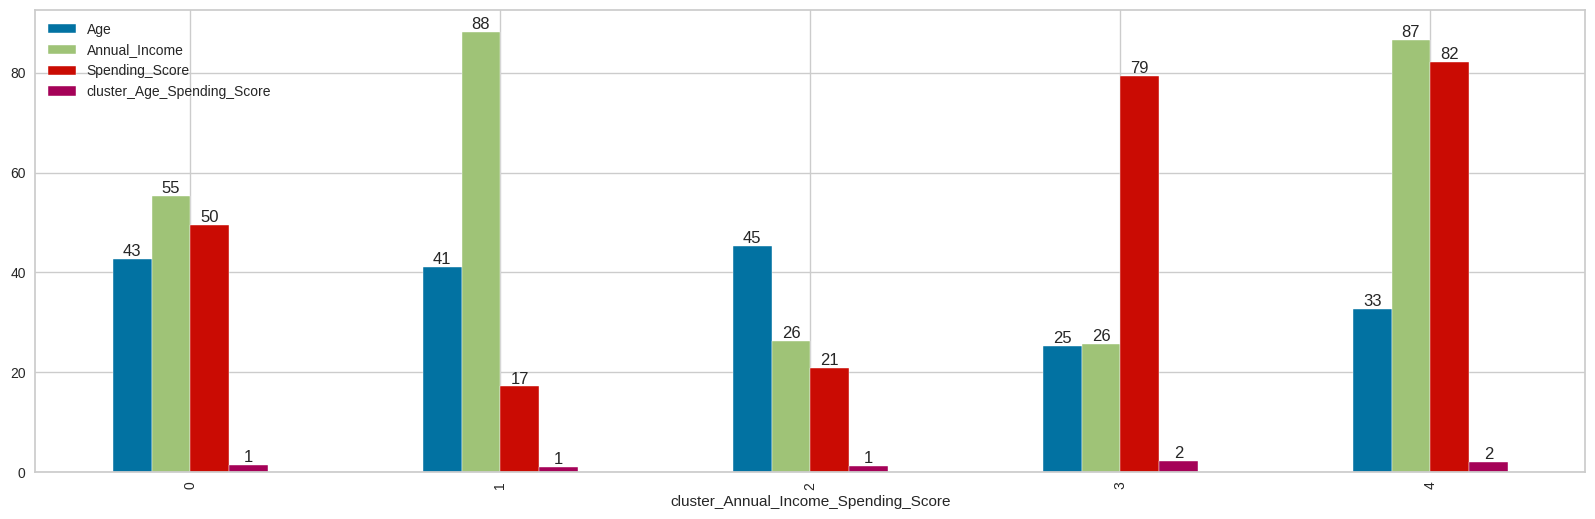

In [102]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___